# Case Study: Yakubu Traiding Group - Algorithm Staff Promotion

### Objective: Study the pattern of promotion to understand the important features among available features that can be used to recommend promotion eligibility.

## 1. Importing and Exploring the data

In [1]:
# Importing libraries for data manipulation and visualization
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for model use and validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import warnings 
warnings.filterwarnings('ignore')
# import libraries for model use and validation

In [2]:
# Loading the dataset
df= pd.read_csv("promotion_dataset.csv")

In [3]:
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,MSc MBA and PhD,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [4]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [5]:
# no of rows and colums
df.shape
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows in the dataset')

There are 19 columns and 38312 rows in the dataset


In [6]:
# Overview of numerical columns
df.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,1.040953,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,1.235738,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,1.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,1.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,6.000000,1.000000


In [7]:
# Overview of categorical columns
df.describe(include=['object']).T

,count,unique,top,freq
EmployeeNo,38312,38312,YAK/S/00001,1
Division,38312,9,Commercial Sales and Marketing,11695
Qualification,36633,3,First Degree or HND,25578
Gender,38312,2,Male,26880
Channel_of_Recruitment,38312,3,Agency and others,21310
State_Of_Origin,38312,37,LAGOS,6204
Foreign_schooled,38312,2,Yes,34995
Marital_Status,38312,3,Married,31022
Past_Disciplinary_Action,38312,2,No,38161
Previous_IntraDepartmental_Movement,38312,2,No,34709


### Observations
#### * Most of the staffs in the company are male and are married. 
#### * Most of the staffs in the company has attained the qualification of first degree or HND.
#### * The state of origin for most of the staffs is Lagos.
#### * A fewer numbers of staffs had been involved in past disciplinary actions and previous intradepartment movement.

## 2. Data Cleaning and Preparation

In [8]:
# check for missing values
df.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [9]:
# fill missing values
df['Qualification'].fillna(df['Qualification'].mode()[0], inplace = True)

In [10]:
# Check if missing values is filled
df.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [11]:
# Checking duplicate values
df.duplicated().any()

False

#### Since the promotion of staffs is considered bias and skewed, a new condition is created for staff promotion using variables 'Trainings_Attended', 'Training_score_average', 'Targets_met' and 'Last_performance_score'. All this variables shows the performance and productivity level of the staff in the company and their quest to improve themselves through training.   

In [12]:
# define conditions
conditions = [
    (df['Trainings_Attended'] >= 2) & (df['Training_score_average'] >= 52) & (df['Targets_met'] == 1) & (df['Last_performance_score'] >=7.5),
    (df['Trainings_Attended'] < 2) & (df['Training_score_average'] < 52) & (df['Targets_met'] == 0) & (df['Last_performance_score'] <7.5)
]

# define results 
results = [1, 0]

# create new column based on condition and results
df['Expected_Promotion'] = np.select(conditions, results)

## 3. Exploratory Data Analysis

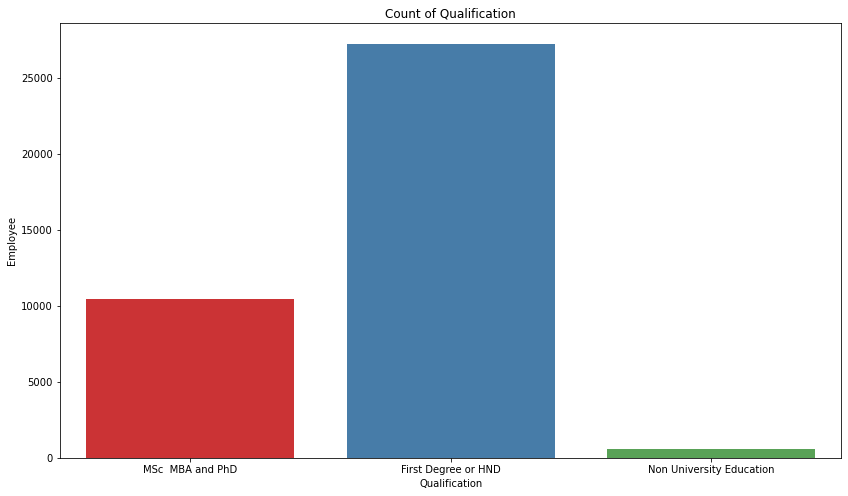

In [13]:
# Plotting Count of Qualification
plt.figure(figsize=(14, 8))
sns.countplot(x='Qualification', data=df, palette='Set1')
plt.title('Count of Qualification')
plt.xlabel('Qualification')
plt.ylabel('Employee')
plt.show()

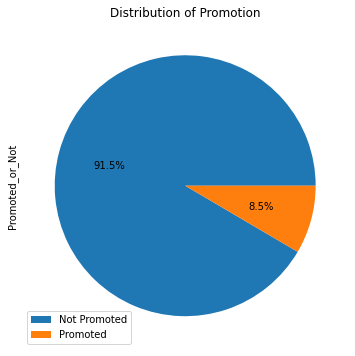

In [14]:
df['Promoted_or_Not'].value_counts().plot.pie(figsize=(6,6),title="Distribution of Promotion",labels=['',''],autopct='%1.1f%%')
labels=["Not Promoted","Promoted"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

#### 91.5% of the staffs were not promoted while only 8.5% of the total staffs were promoted.

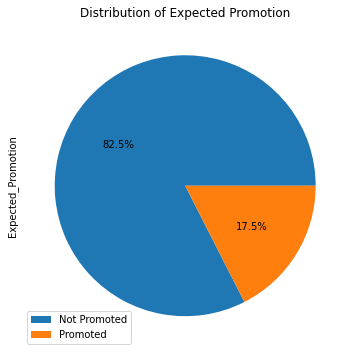

In [15]:
df['Expected_Promotion'].value_counts().plot.pie(figsize=(6,6), title="Distribution of Expected Promotion",labels=['',''],autopct='%1.1f%%')
labels=["Not Promoted","Promoted"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

#### Based on the new criteria for promotion 17.5% of staffs qualify for promotion

<Figure size 864x720 with 0 Axes>

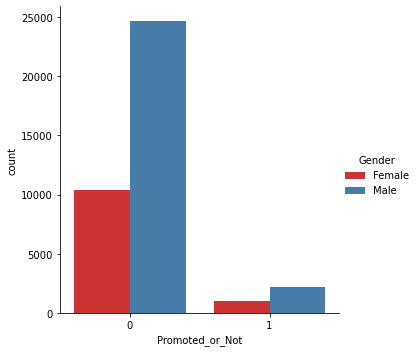

In [16]:
# Gender distribution of promotion
plt.figure(figsize=(12, 10))
sns.catplot(x='Promoted_or_Not', hue='Gender', kind='count', data=df, palette='Set1')
plt.show()

<Figure size 864x720 with 0 Axes>

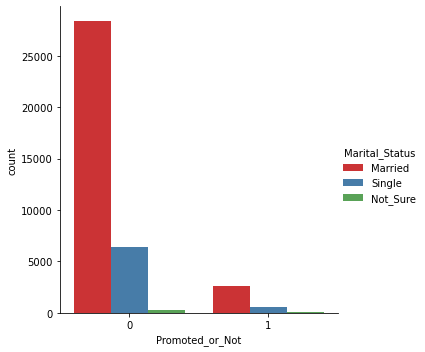

In [17]:
# Marital status distribution of promotion
plt.figure(figsize=(12, 10))
sns.catplot(x='Promoted_or_Not', hue='Marital_Status', kind='count', data=df, palette='Set1')
plt.show()

<Figure size 864x720 with 0 Axes>

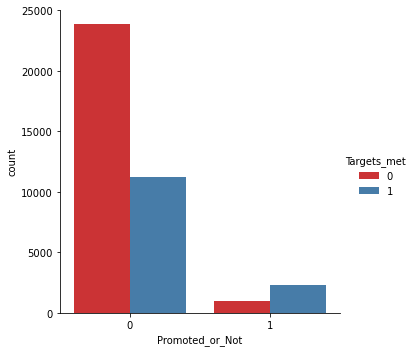

In [18]:
# Target met distribution of promotion
plt.figure(figsize=(12, 10))
sns.catplot(x='Promoted_or_Not', hue='Targets_met', kind='count', data=df, palette='Set1')
plt.show()

<Figure size 864x720 with 0 Axes>

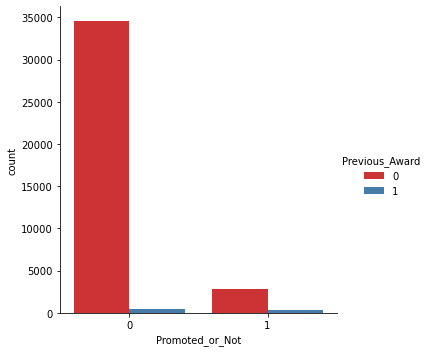

In [19]:
# Previous award distribution of promotion
plt.figure(figsize=(12, 10))
sns.catplot(x='Promoted_or_Not', hue='Previous_Award', kind='count', data=df, palette='Set1')
plt.show()

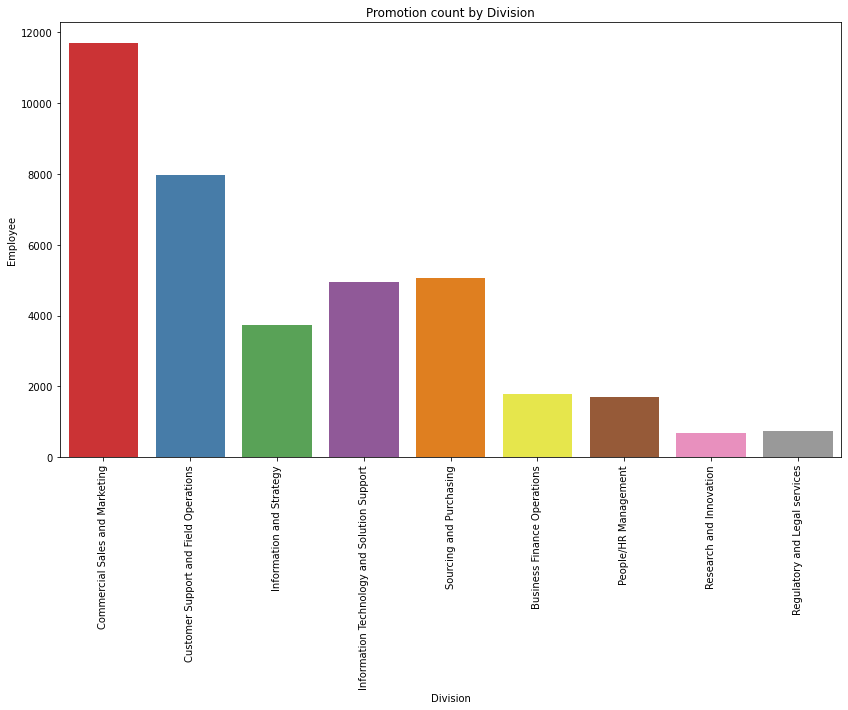

In [20]:
# Promotion count by division
plt.figure(figsize=(14, 8))
sns.countplot(x='Division', data=df, palette='Set1')
plt.title('Promotion count by Division')
plt.xlabel('Division')
plt.ylabel('Employee')
plt.xticks(rotation=90)
plt.show()

#### The division having the highest number of staffs is 'Commercial sales and marketing' while the division with the least number of staffs is 'Research and Innovation'. 

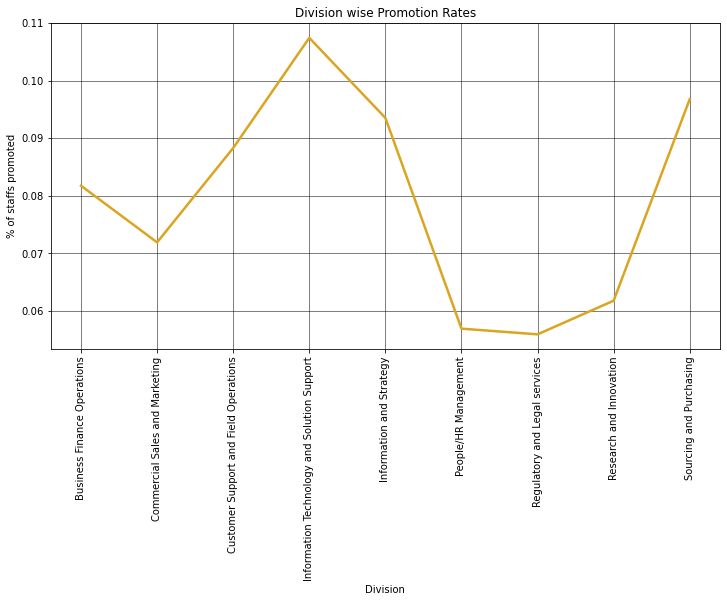

In [21]:
p= df.groupby(['Division','Promoted_or_Not'])['Promoted_or_Not'].count().unstack().fillna(0)
p['%']=p[1]/(p[0]+p[1])
plt.figure(figsize=(12,6))
plt.plot(p['%'], color='goldenrod', linewidth=2.5)
plt.grid(color='black', linestyle= '-', linewidth= 0.5)
plt.title('Division wise Promotion Rates')
plt.xlabel('Division')
plt.ylabel('% of staffs promoted')
plt.xticks(rotation=90)
plt.show() 

#### The division with the highest number of staffs promoted is 'Information technology and solution support' while the division with the least number of staffs promoted is 'Regulatory and legal services'. 

#### Correlation Matrix

In [22]:
# Correlation between variables
df.corr()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Promoted_or_Not,Expected_Promotion
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,0.000796,-0.024345,-0.000133
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,-0.003117,0.017991,-0.015657
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,-0.005428,0.119690,0.335514
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,-0.003550,0.012287,0.000938
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,-0.003308,0.224518,0.623613
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.003887,0.201434,0.064740
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.008194,0.178448,0.355623
No_of_previous_employers,0.000796,-0.003117,-0.005428,-0.003550,-0.003308,0.003887,0.008194,1.000000,0.001690,0.001855
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,0.001690,1.000000,0.178882
Expected_Promotion,-0.000133,-0.015657,0.335514,0.000938,0.623613,0.064740,0.355623,0.001855,0.178882,1.000000


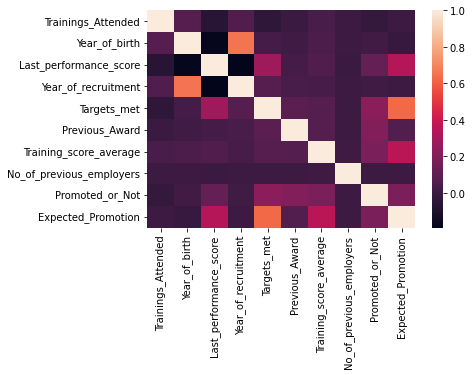

In [23]:
# Heatmap visualization of the correlation
dataplot=sns.heatmap(df.corr())
plt.show()

#### From the correlation, the variables that affects if an employee is promoted or not is Targets_met, Training_score_average, Previous_Award, Last_performance_score. 

## 4. Feature Selection

In [24]:
feature_cols = ['Targets_met', 'Training_score_average', 'Previous_Award', 'Last_performance_score']
X = df[feature_cols]
y = df.Expected_Promotion

#### Splitting the dataset into training and test data

In [25]:
# split dataset in training and test dataset in proportions (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30649, 4)
(7663, 4)
(30649,)
(7663,)


## 5. Model Training

#### Creating the Model

In [27]:
# Instantiate the classifier
model = LogisticRegression()

In [28]:
# Train the classifier
model.fit(X_train, y_train)

LogisticRegression()

#### Making Predictions

In [29]:
# Predicting the class label
y_pred = model.predict(X_test)

#### Confusion Matrix

In [30]:
metrics.confusion_matrix(y_test, y_pred)

array([[6099,  225],
       [ 184, 1155]], dtype=int64)

#### Accuracy Score

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.9466266475270781

#### F1 Score

In [32]:
metrics.f1_score(y_test, y_pred)

0.8495770503861715

#### Roc_auc_score

In [33]:
metrics.roc_auc_score(y_test, y_pred)

0.9135026351478702

#### Classification Report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6324
           1       0.84      0.86      0.85      1339

    accuracy                           0.95      7663
   macro avg       0.90      0.91      0.91      7663
weighted avg       0.95      0.95      0.95      7663



In [35]:
print(model.intercept_)
print(model.coef_)

[-30.66888255]
[[11.62867488  0.2479297   0.0315417   0.55964744]]


In [36]:
model.predict_proba(X_test)

array([[9.99995995e-01, 4.00487788e-06],
       [9.99999923e-01, 7.71573008e-08],
       [9.99999840e-01, 1.59522681e-07],
       ...,
       [9.99620698e-01, 3.79301698e-04],
       [9.99999398e-01, 6.02021870e-07],
       [9.99999966e-01, 3.35688162e-08]])